In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

try:
    from escape import test_data
except:
    from pathlib import Path
    import sys
    escape_path = Path('../').resolve().absolute().as_posix()
    sys.path.append(escape_path)
    from escape import test_data
from escape import digitize, Array, concatenate

Load test dataset

In [2]:
data = test_data.get_test_data(as_da=False)
print(list(data.keys()))

['i0', 'i', 't', 'i_pump', 'pump_on', 'drift']


The test data consist of intensity behind a sample i and intensity before a sample i0, which is subject to high intensity jitter 

In [3]:
i = data['i']
i0 = data['i0']

<IPython.core.display.Javascript object>


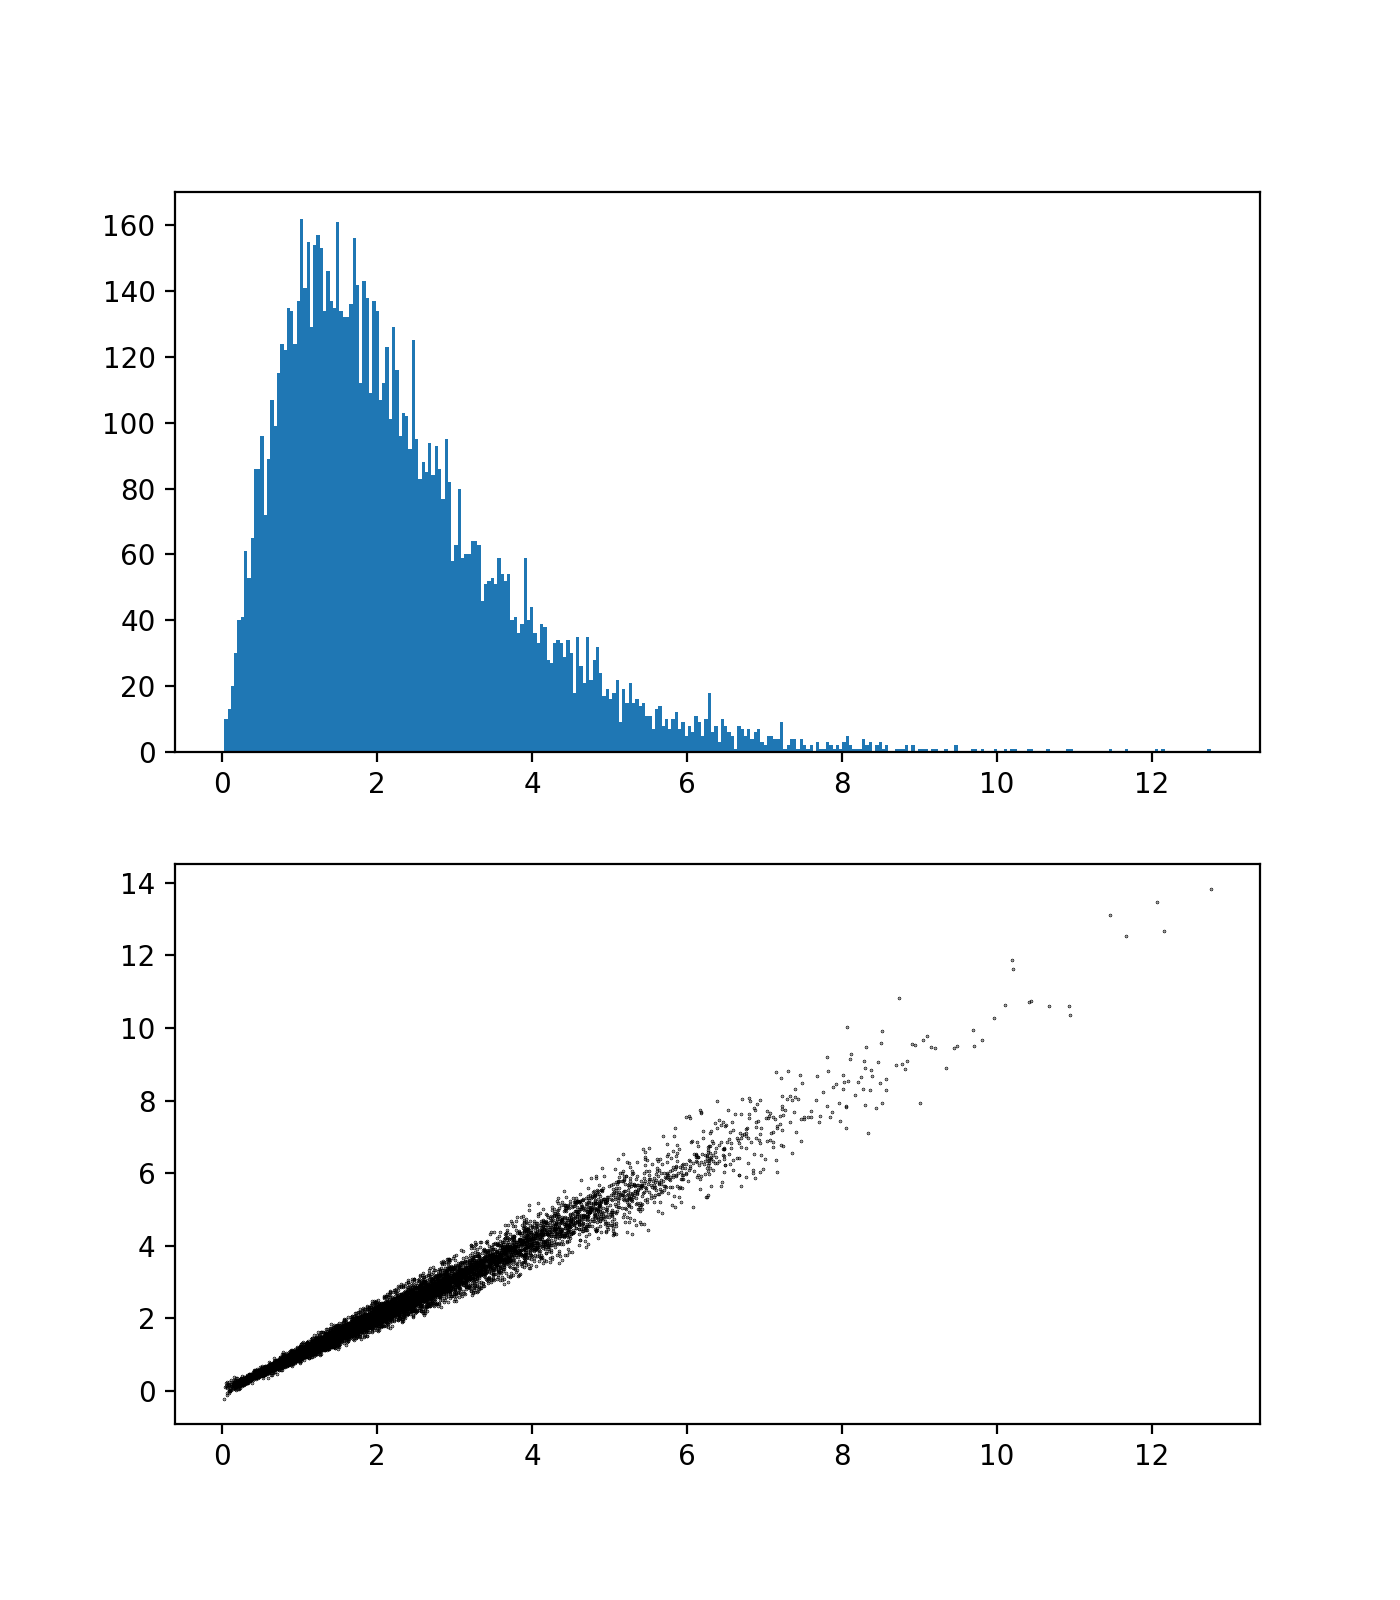

In [4]:
fh, axs = plt.subplots(2,1,figsize=[7,8],num='Intensity properties')
axs[0].hist(i0.data,300)
axs[1].plot(i0.data,i.data,'.k',ms=0.5)

In [5]:
i_n = i/i0
pump_on = data['pump_on']
i_n_on = i_n[pump_on]
i_n_off = i_n[~pump_on]

<IPython.core.display.Javascript object>


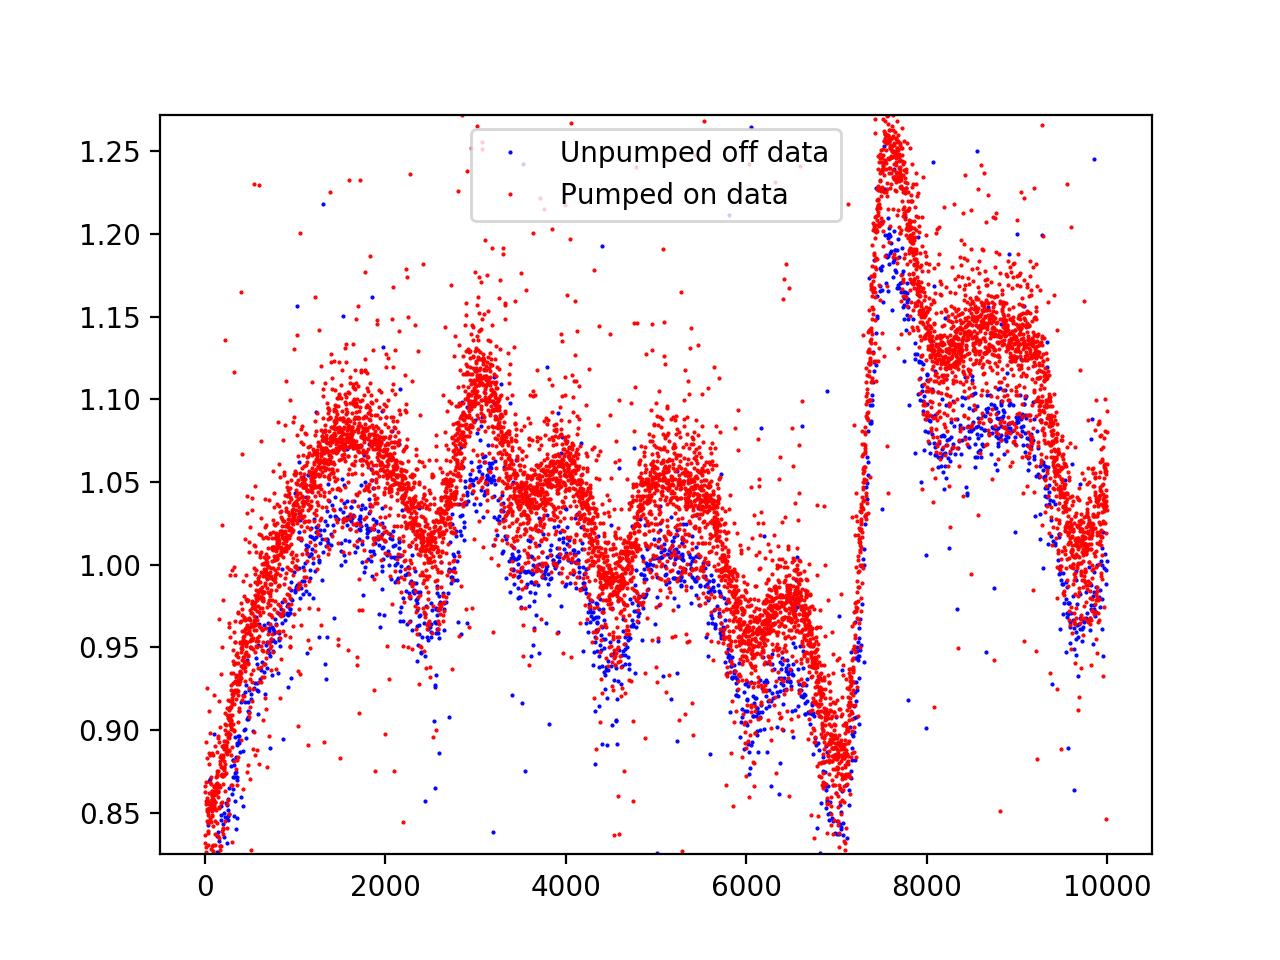

In [6]:
plt.figure('Normalized intensity over all events in data set')
plt.plot(i_n_off.index,i_n_off.data,'.b',ms=1,label='Unpumped off data')
plt.plot(i_n_on.index,i_n_on.data,'.r',ms=1,label='Pumped on data')
plt.ylim(np.percentile(i_n_on.data,[1,99]))
plt.legend()

In [7]:
ids = Array(data=i.index,index=i.index)
ids_b = digitize(ids,np.arange(ids.min(),ids.max(),100))
di_n = concatenate([ti/tir for ti, tir in zip((ids_b.ones()*i_n_on).scan,(ids_b.ones()*i_n_off).scan.mean())])

In [8]:
t = data['t']
t_binned = digitize(t,np.linspace(-5,10,2*150+1))
transient = (t_binned.ones()*di_n).compute()

/home/lemke_h/mypy/escape-fel/escape/storage/storage.py:468: PerformanceWarning: Slicing with an out-of-order index is generating 69 times more chunks
  args.insert(n, arg.data[ixslaves.pop(0)])


[########################################] | 100% Completed | 31.6s


<IPython.core.display.Javascript object>


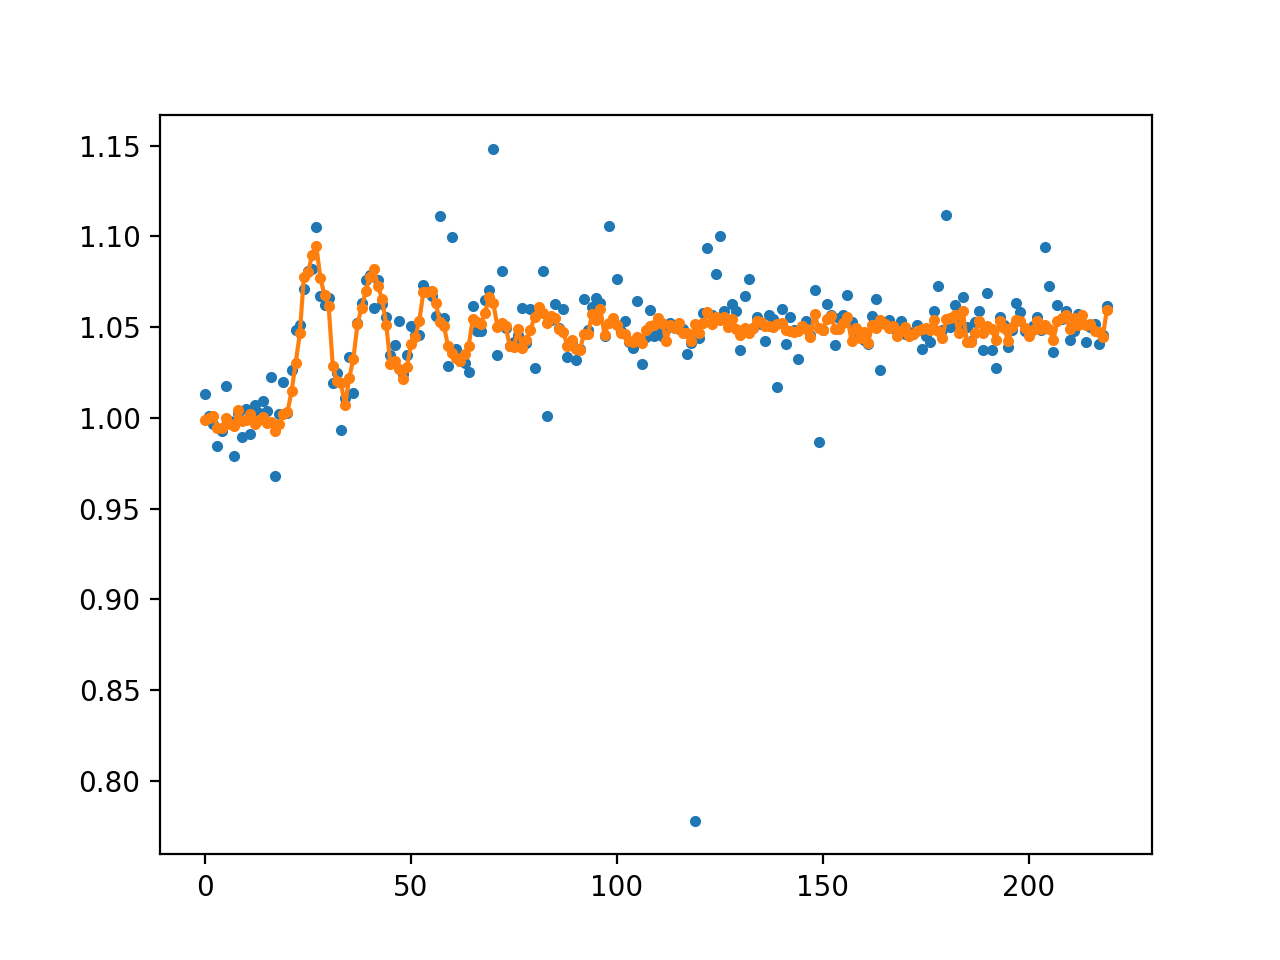

In [9]:
plt.figure('Transient result')

plt.plot([np.mean(ts.data) for ts in transient.scan],'.')
plt.plot([np.median(ts.data) for ts in transient.scan],'.-')